<a href="https://colab.research.google.com/github/hangdragon/Hgdragon_Computer_Science/blob/master/B515211_%ED%95%9C%EC%A7%80%EC%9A%A9_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/15
1000/1000 [==============================] - 116s 116ms/step - loss: 1.3864 - accuracy: 0.5094 - val_loss: 0.7332 - val_accuracy: 0.7390
Epoch 2/15
1000/1000 [==============================] - 116s 116ms/step - loss: 0.9039 - accuracy: 0.6963 - val_loss: 0.3937 - val_accuracy: 0.8836
Epoch 3/15
1000/1000 [==============================] - 117s 117ms/step - loss: 0.7377 - accuracy: 0.7555 - val_loss: 0.3230 - val_accuracy: 0.9000
Epoch 4/15
1000/1000 [==============================] - 116s 116ms/step - loss: 0.6504 - accuracy: 0.7855 - val_loss: 0.2688 - val_accuracy: 0.9175
Epoch 5/15
1000/1000 [==============================] - 116s 116ms/step - loss: 0.5978 - accuracy: 0.8004 - val_loss: 0.2735 - val_accuracy: 0.9080
Epoch 6/15
1000/1000 [==============================] - 116s 116ms/step - loss: 0.5573 - accuracy: 0.8160 - val_loss: 0.2392 - val_accuracy: 0.9228
Epoch 7/15
1000/1000 [==============================] - 116s 116ms/step - loss: 0.5282 - accuracy: 0.8249 - val_

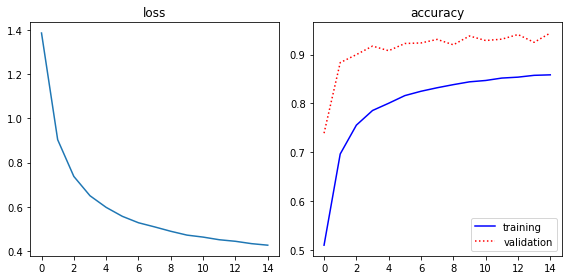

Training Data들이 제대로 augmentation되었는지 확인해보겠습니다.

augmentated_train_data_iterator의 length : 1000
augmentated_images의 shape : (120, 28, 28)
augmentated_images의 shape : (120,)


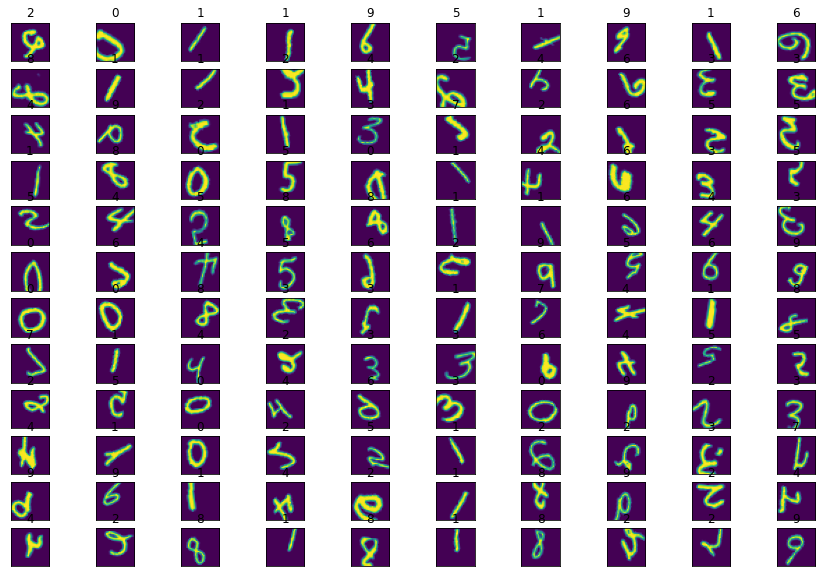

"\nimport cv2 as cv\nimport numpy as np\nfrom tensorflow.keras.models import load_model\n\n\nimg_color = cv.imread('test3.jpg', cv.IMREAD_COLOR)\nimg_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)\n\n\nret,img_binary = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)\n\nkernel = cv.getStructuringElement( cv.MORPH_RECT, ( 5, 5 ) )\nimg_binary = cv.morphologyEx(img_binary, cv. MORPH_CLOSE, kernel)\n\ncv.imshow('digit', img_binary)\ncv.waitKey(0)\n\ncontours, hierarchy = cv.findContours(img_binary, cv.RETR_EXTERNAL, \n                        cv.CHAIN_APPROX_SIMPLE)\n\nfor contour in contours:\n\n    x, y, w, h = cv.boundingRect(contour)\n\n\n\n    length = max(w, h) + 60\n    img_digit = np.zeros((length, length, 1),np.uint8)\n\n    new_x,new_y = x-(length - w)//2, y-(length - h)//2\n\n\n    img_digit = img_binary[new_y:new_y+length, new_x:new_x+length]\n\n    kernel = np.ones((5, 5), np.uint8)\n    img_digit = cv.morphologyEx(img_digit, cv.MORPH_DILATE, kernel)\n\n

In [0]:
# -*- coding : utf - 8 -*-

"""
손글자 인식 시스템 만들기
B515211 한지용
시스템 구성은 다음과 같습니다.
1) data augmentation을 해준뒤 모델링을 하는 부분
2) cv2로 내가 종이에 쓴 글자들을 윈도잉하여 추출해내는 부분
3) 학습한 파라미터들을 불러와서 그 모델 안에 추출해낸 validation 그림들을 넣는 부분 -> 추후 검증!
"""
import os # OMP: Error #15: Initializing libiomp5.dylib 이 에러를 해결해주기 위해 넣어준 코드. 아래 한줄도 동일
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow.keras.datasets import mnist #mnist data
from tensorflow.keras.models import Sequential #Sequential 객체를 생성하여 이것으로 CNN을 모델링 한다.
from tensorflow.keras.layers import Dense, Dropout, Flatten
#Dense : NN에서의 레이어의 전반적인 틀 짜기.(여기서는 마지막 FC층에서의 NN의 레이어)
#Dropout : overfitting을 막아주기 위한 장치. 정해놓은 비율로 파라미터를 랜덤하게 없애준다. 이것으로부터 우연의 효과?를 얻을 수 있다.
#Flatten : ConV , Pooling층들을 거친 후 최종 단계인 FC로 가기전에 Flattening을 도와줌
from tensorflow.keras.layers import Conv2D, MaxPooling2D #Conv와 MaxPooling을 도와줌.
from tensorflow.keras.utils import to_categorical #mnist에서 불러온 label들을 one-hot encoing해주는 함수.
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Data-Augmentation을 도와주는 막강한 클래스

import numpy as np #기본적으로 ndarray로 이루어져있는 데이터들을 처리해주기 위함.
import matplotlib.pyplot as plt #colab에서는 cv2의 imshow가 안돼서 plt로 showing을 할 예정.

(x_train, y_train), (x_test, y_test) = mnist.load_data() #mnist데이터 train : 60000장 , test : 10000장 불러옴.

x_train = np.append(x_train,x_train,axis = 0) 
y_train = np.append(y_train,y_train,axis = 0)
x_test = np.append(x_test,x_test,axis = 0)
y_test = np.append(y_test,y_test,axis = 0)
#트레이닝 데이터를 똑같은걸 하나 더 붙여서 데이터 총 갯수를 2배씩 해줌.
# 이렇게 해준 이유는, 뒤에서 ImageDataGenerator를 사용할때 트레이닝 데이터의 크기를 키워서 CNN의 정확도를 올리기 위함임. 

batch_size = 120
num_classes = 10
epochs = 15

img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) #그냥 NN에서와는 다르게, CNN에서는 채널에 대한 항을 추가해줘야함. 4차원 벡터 써야함.
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') #mnist들은 각 픽셀당 값이 int라서 float으로 cast
x_test = x_test.astype('float32') 
x_train /= 255 #0~255의 값을 그대로 학습시키면 각 픽셀당 레인지가 너무 커져서 원하는 결과랑 멀어짐. 따라서 레인지를 낮추고자 0~1 사이 값으로 함.
x_test /= 255

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25)) #오버피팅 막는 드랍 아
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

datagen = ImageDataGenerator( #참고로, 실제로 트레이닝 과정안에 들어간 트레이닝 데이터는 위에서 지정해준 datagen이다. 여기서 얘는 그저 plt로 확인용!
        rotation_range=40, #40도까지 랜덤하게 rotation
        width_shift_range=0.2, #0.2만큼 폭을 두고 랜덤하게 좌우로 평행이동
        height_shift_range=0.2, #0.2만큼 폭을 두고 랜덤하게 상하로 평행이동
        shear_range=0.2, #임의 전단 변환
        zoom_range=0.2, #0.2 비율 폭을 두고 랜덤하게 스케일링
        horizontal_flip=True, #50프로 확률로 좌우 반전
        vertical_flip=True, #50프로 확률로 상하 반전
        fill_mode='nearest') #이미지를 회전,이동,축소시에 생기는 공간을 채워넣음.

hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_test, y_test),
                    epochs=epochs)

score = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss']) #model.fit의 history를 이용하여 그림 그리기.
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="training")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

model.save('model.h5')


#=============================이미지들이 제대로 augmentation들이 되었는지 확인=====================================
print('Training Data들이 제대로 augmentation되었는지 확인해보겠습니다.\n')
just_showing_datagen = ImageDataGenerator( #참고로, 실제로 트레이닝 과정안에 들어간 트레이닝 데이터는 위에서 지정해준 datagen이다. 여기서 얘는 그저 plt로 확인용!
        rotation_range=40, #40도까지 랜덤하게 rotation
        width_shift_range=0.2, #0.2만큼 폭을 두고 랜덤하게 좌우로 평행이동
        height_shift_range=0.2, #0.2만큼 폭을 두고 랜덤하게 상하로 평행이동
        shear_range=0.2, #임의 전단 변환
        zoom_range=0.2, #0.2 비율 폭을 두고 랜덤하게 스케일링
        horizontal_flip=True, #50프로 확률로 좌우 반전
        vertical_flip=True, #50프로 확률로 상하 반전
        fill_mode='nearest') #이미지를 회전,이동,축소시에 생기는 공간을 채워넣음.

augmentated_train_data_iterator = just_showing_datagen.flow(x_train, y_train, batch_size=batch_size) #얘는 이터레이터임. 따라서 한번 참조끝나면 사라짐.

(augmentated_images,augmentated_labels) = next(augmentated_train_data_iterator) #이터레이터 한번 next시켜서 하나 뽑아냄 (128개의 변경된 image와 labels가 들어있는 튜플이다)
augmentated_images = np.reshape(augmentated_images,[batch_size,28,28]) #channel에 해당하는 맨 뒷차원 제거
augmentated_labels = np.array(list(map(np.argmax,augmentated_labels))) # one hot decoding을 np.argmax로 해줬음

print(f'augmentated_train_data_iterator의 length : {len(augmentated_train_data_iterator)}')
print(f'augmentated_images의 shape : {(augmentated_images).shape}')
print(f'augmentated_images의 shape : {(augmentated_labels).shape}')
fig = plt.figure(figsize=(15, 10))

for i in range(batch_size):  # 원래꺼랑 augmentation된 것의 사진을 둘다 띄워서 변경이 잘 되었는지 확인.
    subplot = fig.add_subplot(12, 10, i+1)
    subplot.imshow(augmentated_images[i])
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title(str(augmentated_labels[i])) #각 subplot에 subtitle로 해당 label 숫자들을 붙여줌.
plt.show()
#=====================================augmentated된 트레이닝 데이터 확인 끝========================================




In [0]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))


Saving B515211_numbers_final.jpeg to B515211_numbers_final.jpeg
User uploaded file "B515211_numbers_final.jpeg" with length 608010 bytes


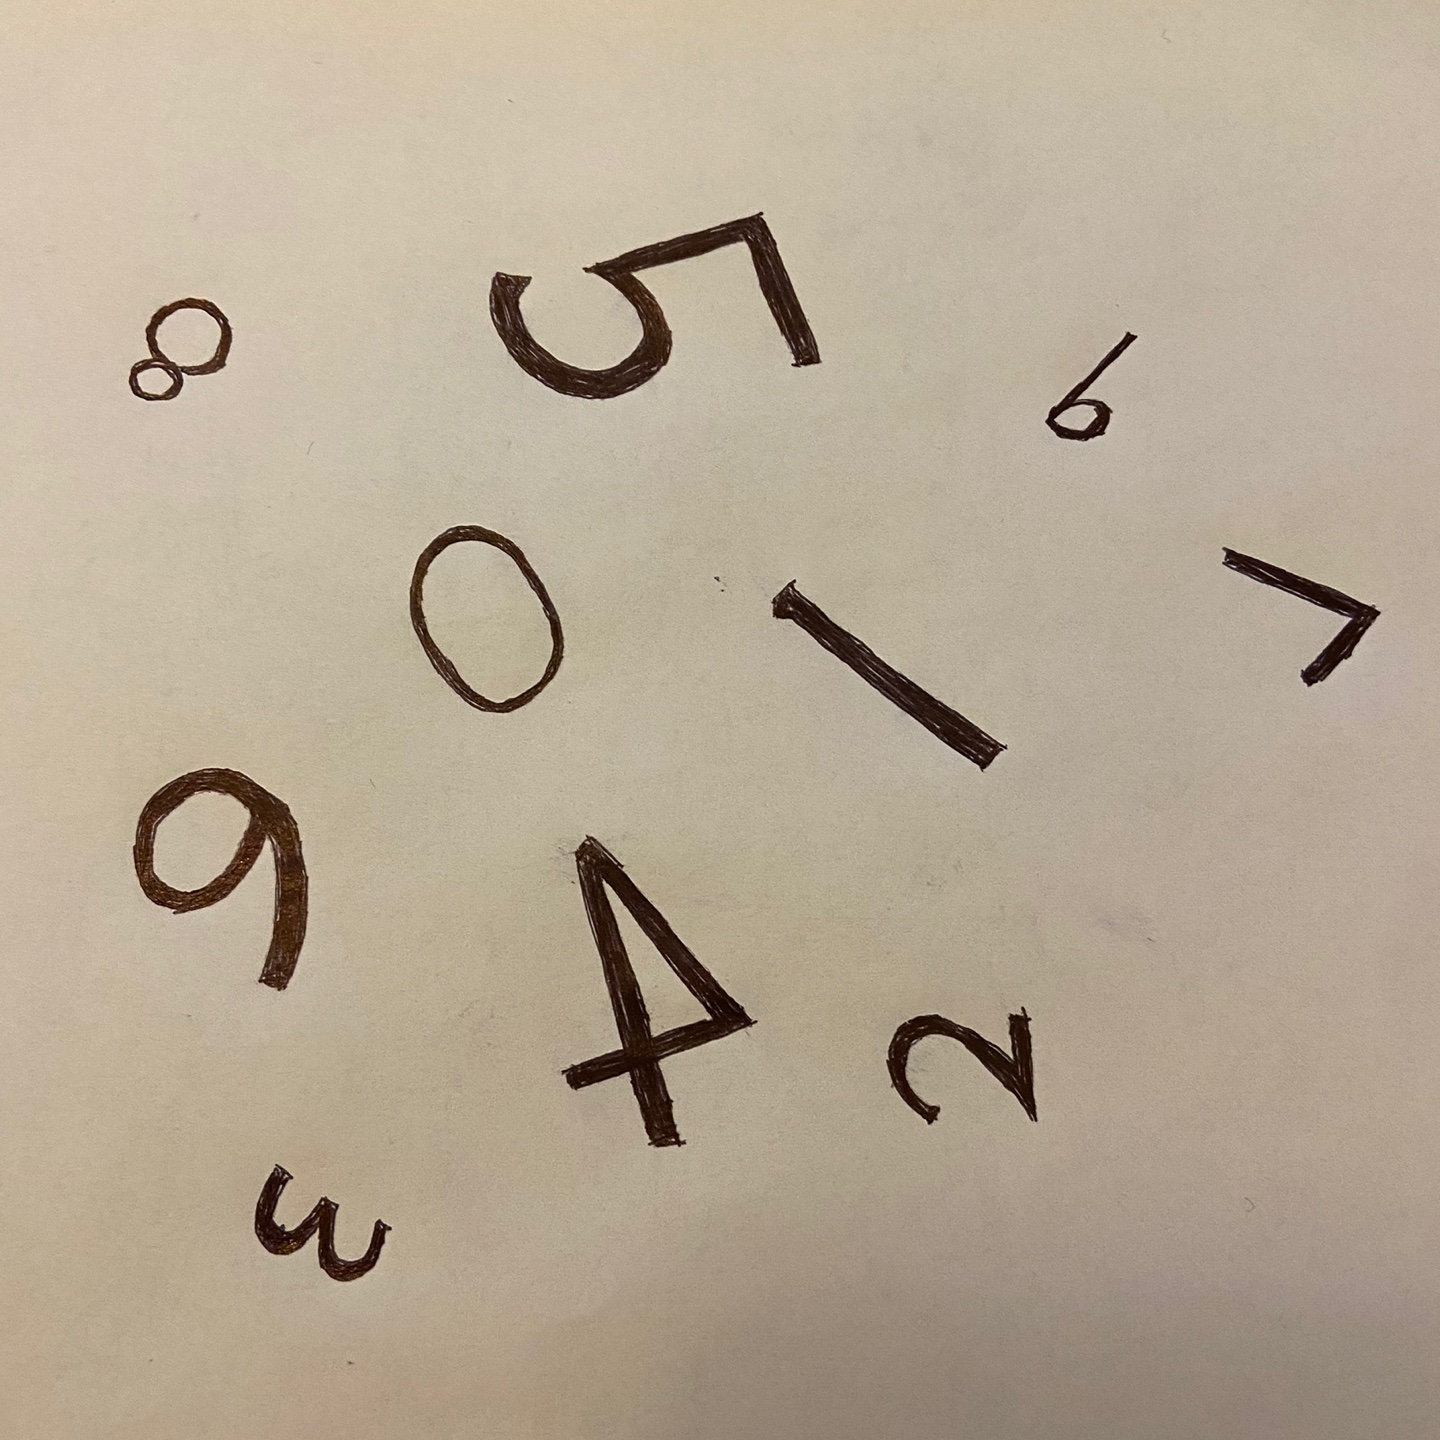

In [0]:
from IPython.display import Image
Image('B515211_numbers_final.jpeg')

1
3
4
1
1
4
6
1
1
1
7
0
9
8
5


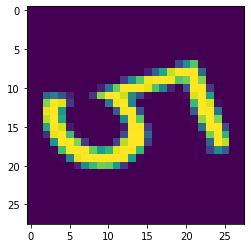

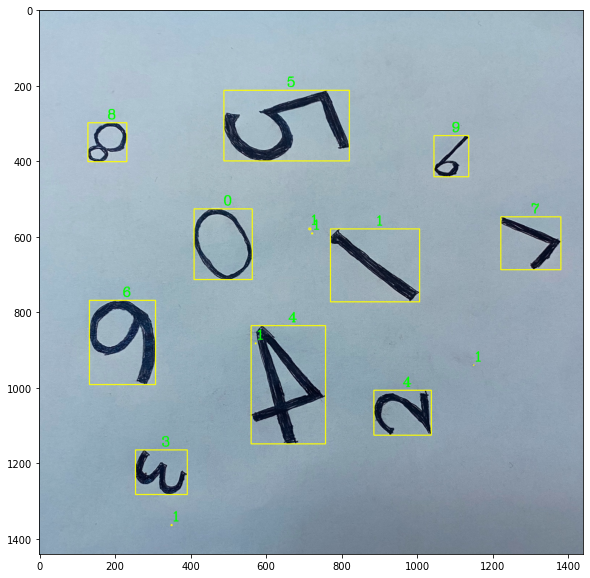

In [0]:
import cv2 as cv
import numpy as np
from tensorflow.keras.models import load_model

img_color = cv.imread('B515211_numbers_final.jpeg', cv.IMREAD_COLOR) #파일을 유색으로 읽어온다.
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY) #흑백으로 읽는다.

ret, img_binary = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
img_binary = cv.morphologyEx(img_binary, cv.MORPH_CLOSE, kernel)

#cv.imshow('digit', img_binary)
plt.imshow(img_binary)
cv.waitKey(0)

contours, hierarchy = cv.findContours(img_binary, cv.RETR_EXTERNAL,
                                      cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)

    length = max(w, h) + 60
    img_digit = np.zeros((length, length, 1), np.uint8)

    new_x, new_y = x - (length - w) // 2, y - (length - h) // 2

    img_digit = img_binary[new_y:new_y + length, new_x:new_x + length]

    kernel = np.ones((5, 5), np.uint8)
    img_digit = cv.morphologyEx(img_digit, cv.MORPH_DILATE, kernel)

    #cv.imshow('digit', img_digit)
    plt.imshow(img_digit)
    cv.waitKey(0)

    model = load_model('model.h5')

    img_digit = cv.resize(img_digit, (28, 28), interpolation=cv.INTER_AREA)

    img_digit = img_digit / 255.0

    img_input = img_digit.reshape(1, 28, 28, 1)
    predictions = model.predict(img_input)

    number = np.argmax(predictions)
    print(number)

    cv.rectangle(img_color, (x, y), (x + w, y + h), (255, 255, 0), 2)

    location = (x + int(w * 0.5), y - 10)
    font = cv.FONT_HERSHEY_COMPLEX
    fontScale = 1.2
    cv.putText(img_color, str(number), location, font, fontScale, (0, 255, 0), 2)

    #cv.imshow('digit', img_digit)
    
    plt.imshow(img_digit)
    cv.waitKey(0)

#cv.imshow('result', img_color)
plt.figure(figsize = (10,10))
plt.imshow(img_color)
plt.show()
#cv.waitKey(0)